## Análisis de la columna "location"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Obtenemos el dataframe:

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
len(df)

7613

In [4]:
df.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

Se observa que `location` es la columna que mayor cantidad de valores nulos tiene. Veamos cuales son sus valores únicos.

In [5]:
df["location"].value_counts()

USA                104
New York            71
United States       50
London              45
Canada              29
                  ... 
Royton               1
New Britain, CT      1
|-/                  1
?205?478?            1
Quincy MA            1
Name: location, Length: 3341, dtype: int64

In [6]:
df["location"].value_counts().describe()

count    3341.000000
mean        1.520503
std         3.022364
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       104.000000
Name: location, dtype: float64

Como se puede ver, varias de las ubicaciones más frecuentes pertenecen a los Estados Unidos, siendo `USA` la que mayor cantidad de tweets tiene. También se puede observar que existen valores que no se corresponden con ubicaciones reales, con poca densidad.

In [7]:
df["location"].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [8]:
df["location"].value_counts().tail(10)

Official Website                1
#goingdownthetoilet Illinois    1
11/4/14                         1
LP, MN USA                      1
NIFC                            1
Royton                          1
New Britain, CT                 1
|-/                             1
?205?478?                       1
Quincy MA                       1
Name: location, dtype: int64

Podemos obtener, por ejemplo, los tweets de las 10 ubicaciones más frecuentes:

In [9]:
top_locations = df["location"].value_counts().nlargest(10).index.to_list()
tweets_from_top_locations = df[df["location"].isin(top_locations)]

Y con estos datos realizar un gráfico:

Text(0, 0.5, 'Ubicación')

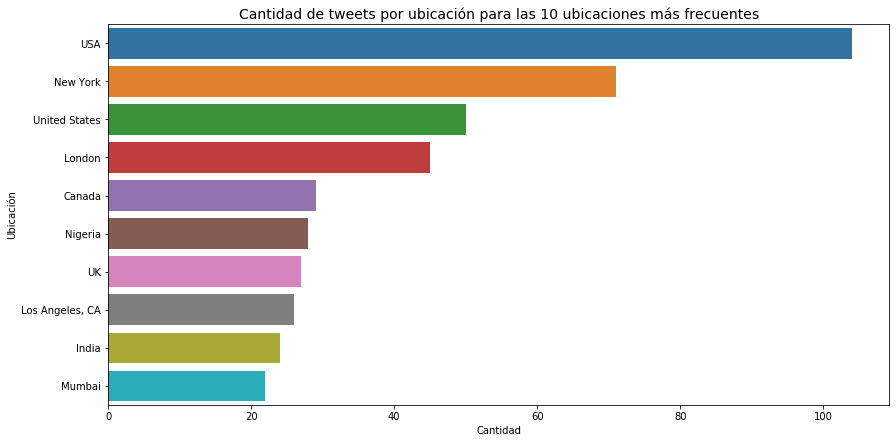

In [10]:
plt.figure(figsize=(14,7))

sns.countplot(
    y="location",
    data=tweets_from_top_locations,
    order=top_locations
)

plt.title("Cantidad de tweets por ubicación para las 10 ubicaciones más frecuentes", fontsize=14)
plt.xlabel("Cantidad")
plt.ylabel("Ubicación")

Analicemos ahora los tweets diferenciándolos por su `target`:

In [11]:
real_tweets = df.loc[df["target"] == 1]
false_tweets = df.loc[df["target"] == 0]

In [12]:
len(real_tweets)

3271

In [13]:
real_tweets["location"].value_counts().head(10)

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
London            16
New York          16
UK                16
Washington, DC    15
Canada            13
Name: location, dtype: int64

In [14]:
len(false_tweets)

4342

In [15]:
false_tweets["location"].value_counts().head(10)

New York           55
USA                37
London             29
United States      23
Los Angeles, CA    18
Canada             16
Kenya              15
Everywhere         12
Florida            11
UK                 11
Name: location, dtype: int64

In [16]:
tweet_counts = (df.groupby(["location", "target"])
                .agg({"text": "count"})
                .reset_index()
                .rename(columns={"text": "count"}))

tweet_counts_from_top_locations = tweet_counts.loc[tweet_counts["location"].isin(top_locations)]

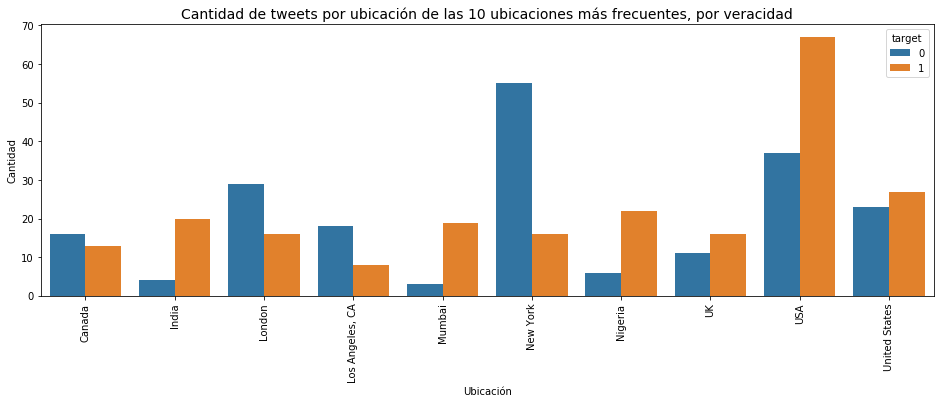

In [17]:
plt.figure(figsize=(16,5))
p = sns.barplot(x="location", y="count", hue="target", data=tweet_counts_from_top_locations)
plt.title("Cantidad de tweets por ubicación de las 10 ubicaciones más frecuentes, por veracidad", fontsize=14)
plt.xlabel("Ubicación")
plt.ylabel("Cantidad")
plt.setp(p.get_xticklabels(), rotation=90)
plt.show()